#Visão Geral


##Análise 1 
###Foi percebido um aumento substancial das vendas no e-commerce no segundo trimestre de 2020. Analise a evolução do faturamento ao longo dos meses.

In [ ]:
import pandas as pd
import sqlalchemy
import os
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Importando a base de dados

In [ ]:
engine_str='sqlite://///content/drive/MyDrive/Vai Academy/Case 2/Dados/vaistore.sqlite'
engine = sqlalchemy.create_engine(engine_str)
sqlalchemy.inspect(engine).get_table_names()

['info_produto', 'pedidos']

In [ ]:
con = engine.connect()
query = 'SELECT * FROM pedidos'
rs = con.execute(query)
results = rs.fetchall()
df = pd.DataFrame(results)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57


Atribuindo nome as colunas

In [ ]:
columns = con.execute(query).keys()
df.columns = columns
df.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57


Características do df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATA_VENDA          296937 non-null  object 
 1   PEDIDO              296937 non-null  int64  
 2   PEDIDO_ERP          296937 non-null  object 
 3   COD_CLIENTE         296937 non-null  int64  
 4   PRODUTO             296937 non-null  object 
 5   QTDE                296937 non-null  int64  
 6   PRECO_UNITARIO      296937 non-null  float64
 7   DESCONTO_ITEM       296937 non-null  float64
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64
 9   RECEITA             296937 non-null  float64
 10  CUSTO_FRETE         296937 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 24.9+ MB


In [ ]:
df.describe()

,PEDIDO,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
count,2.969370e+05,2.969370e+05,296937.000000,296937.000000,296937.000000,296937.000000,296937.000000,296937.000000
mean,8.245409e+06,4.071741e+06,1.096071,88.702216,-3.320825,7.565462,96.737892,10.695023
std,9.617816e+07,4.240777e+04,0.732218,91.983725,20.480290,7.902874,97.317731,10.387043
min,7.000001e+06,4.000001e+06,1.000000,1.000000,-7135.200000,0.000000,1.080000,0.000000
25%,7.045000e+06,4.034865e+06,1.000000,29.900000,0.000000,0.000000,32.900000,4.080000
50%,7.092251e+06,4.070934e+06,1.000000,59.900000,0.000000,6.400000,69.900000,8.090000
75%,7.128757e+06,4.107895e+06,1.000000,129.900000,0.000000,12.900000,137.410000,14.580000
max,8.000000e+09,4.146333e+06,100.000000,2499.900000,80.000000,147.320000,8001.100000,324.990000


Requisição para para avaliação da receita por mês


In [ ]:
data_receita = df[['DATA_VENDA', 'RECEITA']]
data_receita


,DATA_VENDA,RECEITA
0,2020-01-01 00:00:00.000000,182.22
1,2020-01-01 00:00:00.000000,189.90
2,2020-01-01 00:00:00.000000,143.84
3,2020-01-01 00:00:00.000000,39.80
4,2020-01-01 00:00:00.000000,218.64
...,...,...
296932,2020-12-10 00:00:00.000000,80.90
296933,2020-12-10 00:00:00.000000,100.40
296934,2020-12-10 00:00:00.000000,240.40
296935,2020-12-10 00:00:00.000000,64.46


Criando uma coluna com o mês da venda

In [ ]:
query = 'SELECT Data_venda, strftime("%m", "Data_venda") as "MES" FROM pedidos'
data_mes = pd.read_sql_query(query, engine)
data_mes

,DATA_VENDA,MES
0,2020-01-01 00:00:00.000000,01
1,2020-01-01 00:00:00.000000,01
2,2020-01-01 00:00:00.000000,01
3,2020-01-01 00:00:00.000000,01
4,2020-01-01 00:00:00.000000,01
...,...,...
296932,2020-12-10 00:00:00.000000,12
296933,2020-12-10 00:00:00.000000,12
296934,2020-12-10 00:00:00.000000,12
296935,2020-12-10 00:00:00.000000,12


Merge entre a tabela mes e a data_receita

In [ ]:
merge = pd.concat([data_mes, data_receita], axis = 1)
merge.drop(labels = ['DATA_VENDA'], axis= 1 )
receita_mes = merge

Criando a receita total por mes

In [ ]:
receita_viz = receita_mes.groupby(receita_mes.MES).sum().reset_index()
receita_viz

,MES,RECEITA
0,01,2.286126e+06
1,02,1.556249e+06
2,03,1.124974e+06
3,04,1.696474e+06
4,05,4.600114e+06
5,06,3.736710e+06
6,07,2.253901e+06
7,08,1.905498e+06
8,09,1.203432e+06
9,10,1.480890e+06


Criando gráfico da receita por mes

<BarContainer object of 12 artists>

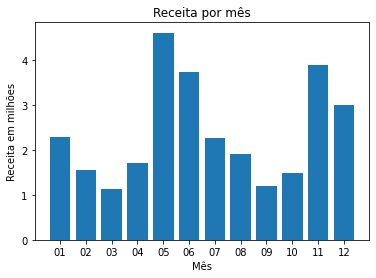

In [ ]:
x_axis = receita_viz.MES
y_axis = (receita_viz.RECEITA)/1000000

title = 'Receita por mês'
xlabel = 'Mês'
ylabel = 'Receita em milhões'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.grid(axis='both')
plt.bar(x_axis, y_axis)


###Resultado
####Houve um aumento expressivo de receita no 2º e no 4º trimestre de 2020

#Novos Clientes


##Análise 2
###Um cliente é considerado ativo caso ele tenha feito compras nos últimos 12 meses. Analise a evolução do número de clientes ativos mês a mês.

Separando as colunas de interesse


In [ ]:
query = 'SELECT data_venda, cod_cliente FROM pedidos'
data_cliente = pd.read_sql_query(query, engine)
data_cliente.columns = ['DATA_VENDA', 'COD_CLIENTE']
data_cliente

,DATA_VENDA,COD_CLIENTE
0,2020-01-01 00:00:00.000000,4040690
1,2020-01-01 00:00:00.000000,4003939
2,2020-01-01 00:00:00.000000,4043259
3,2020-01-01 00:00:00.000000,4090303
4,2020-01-01 00:00:00.000000,4080417
...,...,...
296932,2020-12-10 00:00:00.000000,4049216
296933,2020-12-10 00:00:00.000000,4019312
296934,2020-12-10 00:00:00.000000,4055873
296935,2020-12-10 00:00:00.000000,4086203


In [ ]:
query = 'SELECT data_venda, strftime("%m", "data_venda") as MES FROM pedidos'
data_mes = pd.read_sql_query(query, engine)
data_mes

,DATA_VENDA,MES
0,2020-01-01 00:00:00.000000,01
1,2020-01-01 00:00:00.000000,01
2,2020-01-01 00:00:00.000000,01
3,2020-01-01 00:00:00.000000,01
4,2020-01-01 00:00:00.000000,01
...,...,...
296932,2020-12-10 00:00:00.000000,12
296933,2020-12-10 00:00:00.000000,12
296934,2020-12-10 00:00:00.000000,12
296935,2020-12-10 00:00:00.000000,12


Juntando as duas tabelas

In [ ]:
merge = pd.concat([data_mes, data_cliente], axis = 1)
cliente_mes = merge.drop(labels = ['DATA_VENDA'], axis = 1)
cliente_mes

,MES,COD_CLIENTE
0,01,4040690
1,01,4003939
2,01,4043259
3,01,4090303
4,01,4080417
...,...,...
296932,12,4049216
296933,12,4019312
296934,12,4055873
296935,12,4086203


Removendo clientes repetidos pois o cliente se torna ativo apenas na primeira compra

In [ ]:
cliente_mes_unique = cliente_mes.drop_duplicates(subset=['COD_CLIENTE'], keep = 'first')
cliente_mes_unique

,MES,COD_CLIENTE
0,01,4040690
1,01,4003939
2,01,4043259
3,01,4090303
4,01,4080417
...,...,...
296913,03,4051508
296917,03,4084473
296927,12,4145384
296930,12,4123929


Contando o numero de clientes novos por mês





In [ ]:
cliente_mes_soma = cliente_mes_unique.groupby('MES').count().reset_index()
cliente_mes_soma = cliente_mes_soma.rename(columns = {'COD_CLIENTE': 'CLIENTES_NOVOS'})

Vizualização - Quantidade de Novos clientes por mes

<BarContainer object of 12 artists>

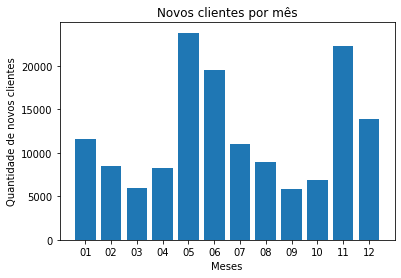

In [ ]:
x_axis = cliente_mes_soma.MES
y_axis = cliente_mes_soma.CLIENTES_NOVOS
xlabel = 'Meses'
ylabel = 'Quantidade de novos clientes'
title = 'Novos clientes por mês'
#plt.grid (axis = 'both')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.bar(x_axis, y_axis)

###Resultado
####Houve um aumento no número de novos clientes no 2° e no 4° trimestre que acompanhou o aumento de receita



##Análise 3
###Qual o canal de marketing que mais trouxe clientes em 2020? Qual foi a receita e margem dos clientes em cada canal? Analisando o investimento de cada canal, qual seria a sua recomendação para a diretoria sobre a alocação de recursos por canal?

Importando a base de dados ORIGEM_TRAFICO

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Vai Academy/Case 2/Dados/ORIGEM_TRAFEGO.csv', sep = ';')
df

,PEDIDO_ERP,CANAL_MARKETING
0,P10000123123,Google Ads
1,P10000123124,Facebook Ads
2,P10000123125,Email
3,P10000123126,Direto
4,P10000123127,Busca orgânica
...,...,...
172026,P10000295149,NaN
172027,P10000295150,NaN
172028,P10000295151,NaN
172029,P10000295152,NaN


###Análise 3.1
#### Qual o canal de marketing que mais trouxe clientes em 2020?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  151600 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,PEDIDO_ERP,CANAL_MARKETING
count,172031,151600
unique,172031,7
top,P10000164257,Google Ads
freq,1,60935


In [ ]:
df.isna().sum()

PEDIDO_ERP             0
CANAL_MARKETING    20431
dtype: int64

Existem mais de 20000 pedidos onde o canal de marketing não foi especificado. Isso pode ter ocorrido por diversos motivos. De qualquer forma, manter esses dados para uma análise de quais canais trouxeram mais clientes não faz sentido.

In [ ]:
pedido_canal = df.dropna()
pedido_canal = df.groupby(by = df.CANAL_MARKETING).count().reset_index()
pedido_canal

,CANAL_MARKETING,PEDIDO_ERP
0,Busca orgânica,28287
1,Direto,17270
2,Email,9373
3,Facebook Ads,14780
4,Google Ads,60935
5,Outros,10065
6,Referência,10890


Visualização - Numero de clientes trazidos por canal de marketing

<BarContainer object of 7 artists>

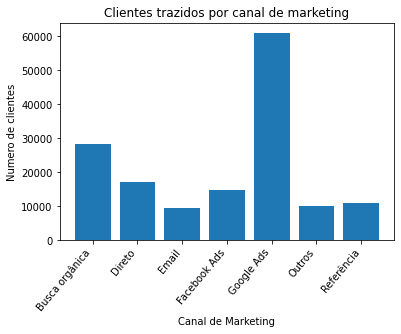

In [ ]:
x_axis = pedido_canal.CANAL_MARKETING
y_axis = pedido_canal.PEDIDO_ERP
title = 'Clientes trazidos por canal de marketing'
x_label = 'Canal de Marketing'
y_label = 'Numero de clientes'
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(rotation = 50, ha = 'right' )
plt.bar(x_axis, y_axis)



###Análise 3.2
####Qual foi a receita e margem dos clientes em cada canal?

Importando base de dados Gasto_com_Mídia

In [ ]:
df_midia = pd.read_excel('/content/drive/MyDrive/Vai Academy/Case 2/Dados/Gasto com Mídia.xlsx')
df_midia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dia           456 non-null    datetime64[ns]
 1   Facebook Ads  410 non-null    float64       
 2   Google Ads    456 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 KB


In [ ]:
df_midia.isna().sum()

Dia              0
Facebook Ads    46
Google Ads       0
dtype: int64

Observa-se que em 46 dias não tem dados sobre gastos com facebook ads. Esse valor sera interpretado como 0, ou seja, não houve gastos nesses dias

In [ ]:
df_midia = df_midia.fillna(value = 0)


In [ ]:
df_midia = df_midia.sort_values(by = ['Dia'], ascending = True)
df_midia

,Dia,Facebook Ads,Google Ads
0,2020-01-01,0.00,987.46
1,2020-01-02,0.00,1165.32
2,2020-01-03,0.00,876.76
3,2020-01-04,0.00,804.85
4,2020-01-05,0.00,899.13
...,...,...,...
451,2021-03-27,350.57,778.54
452,2021-03-28,371.65,994.93
453,2021-03-29,306.72,894.11
454,2021-03-30,303.54,651.89


Observa-se que os dados das campanhas de mídia vão do dia 01-01-2020 até 31-03-2021. Porém, os dados de receita vão até 10-12-2020. Portanto será considerado até essa data

In [ ]:
df_midia = df_midia.iloc[:345, :]
df_midia

,Dia,Facebook Ads,Google Ads
0,2020-01-01,0.00,987.46
1,2020-01-02,0.00,1165.32
2,2020-01-03,0.00,876.76
3,2020-01-04,0.00,804.85
4,2020-01-05,0.00,899.13
...,...,...,...
340,2020-12-06,1060.67,1920.81
341,2020-12-07,1051.21,2815.89
342,2020-12-08,1098.05,2428.61
343,2020-12-09,1036.59,1967.35


Observando gasto com campanha por mês

In [ ]:
df_midia['Mes'] = df_midia['Dia'].dt.month
df_midia_mensal = df_midia.iloc[:, 1:]
df_midia_mensal = df_midia_mensal.groupby(by = ['Mes']).sum().reset_index()
df_midia_mensal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mes,Facebook Ads,Google Ads
0,1,0.00,13328.63
1,2,8687.81,13371.03
2,3,24190.22,10814.21
3,4,36301.19,9608.02
4,5,94095.11,28051.49
5,6,111308.51,33551.99
6,7,89841.67,21001.91
7,8,77997.83,17279.75
8,9,43930.43,17787.46
9,10,28886.52,20473.09


Visualização - Gasto Mensal com Marketing

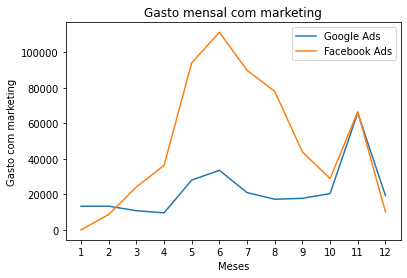

In [ ]:
x_axis = df_midia_mensal.Mes
y_axis_g = df_midia_mensal['Google Ads']
y_axis_f = df_midia_mensal['Facebook Ads']
title = 'Gasto mensal com marketing'
xlabel = 'Meses'
ylabel = 'Gasto com marketing'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.grid(axis = 'both')
plt.xticks(x_axis)
plt.plot(x_axis, y_axis_g, label = 'Google Ads')
plt.plot(x_axis, y_axis_f, label = 'Facebook Ads')
plt.legend()

Ao longo de 2020 o gasto com Facebook Ads foi maior comparado com Google Ads. No mês 6 e no mês 11 houve um pico de gasto com marketing. Esse foram os meses que tiveram maior receita

Criando o df de receita por canal composto pela lista de pedido_erp com o respectivo canal de marketing, merged com a lista de pedido_erp e a receita do pedido.

In [ ]:
pedido_midia = df.dropna()
pedido_midia

,PEDIDO_ERP,CANAL_MARKETING
0,P10000123123,Google Ads
1,P10000123124,Facebook Ads
2,P10000123125,Email
3,P10000123126,Direto
4,P10000123127,Busca orgânica
...,...,...
168860,P10000291983,Facebook Ads
168861,P10000291984,Email
168866,P10000291989,Google Ads
168867,P10000291990,Google Ads


In [ ]:
 query ='SELECT * FROM pedidos'
 qpee = pd.read_sql_query(query, engine)
 qpee[qpee.PEDIDO_ERP == 'P10000123125']

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
3944,2020-01-01 00:00:00.000000,7000002,P10000123125,4067390,B10058G,1,29.9,-29.90,13.57,13.57,13.57
3945,2020-01-01 00:00:00.000000,7000002,P10000123125,4067390,E10300Y,1,289.9,-86.97,13.57,216.50,13.57


A partir da análise acima é possivel observar que existem diversas linhas para o mesmo pedido. Cada linha correponde a um produto do pedido. Portanto, para as analises desejadas, seria interessante fazer a soma da receita

In [ ]:
query = 'SELECT pedido_erp, receita FROM pedidos'
pedido_receita = pd.read_sql_query(query, engine)
pedido_receita = pedido_receita.groupby(by = 'PEDIDO_ERP').sum()
pedido_receita.shape
pedido_receita

,RECEITA
PEDIDO_ERP,
P10000123123,182.22
P10000123124,189.90
P10000123125,230.07
P10000123126,24.90
P10000123127,114.17
...,...
P10000295149,52.90
P10000295150,58.82
P10000295151,104.90


In [ ]:
pedidos = pd.merge(pedido_midia, pedido_receita, how='inner', on = 'PEDIDO_ERP')
pedidos

,PEDIDO_ERP,CANAL_MARKETING,RECEITA
0,P10000123123,Google Ads,182.22
1,P10000123124,Facebook Ads,189.90
2,P10000123125,Email,230.07
3,P10000123126,Direto,24.90
4,P10000123127,Busca orgânica,114.17
...,...,...,...
151595,P10000291983,Facebook Ads,499.70
151596,P10000291984,Email,99.90
151597,P10000291989,Google Ads,172.90
151598,P10000291990,Google Ads,299.90


In [ ]:
pedidos_viz = pedidos.groupby(by = 'CANAL_MARKETING').sum().reset_index()
pedidos_viz

,CANAL_MARKETING,RECEITA
0,Busca orgânica,4.722539e+06
1,Direto,2.963370e+06
2,Email,1.773147e+06
3,Facebook Ads,2.251013e+06
4,Google Ads,1.026167e+07
5,Outros,1.581049e+06
6,Referência,1.788930e+06


Vizualização - Receita por canal de marketing

<BarContainer object of 7 artists>

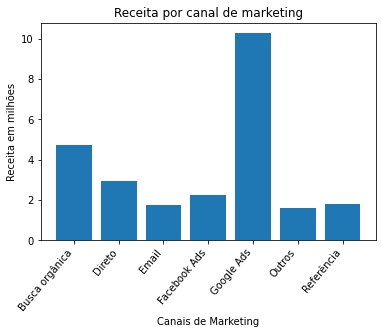

In [ ]:
x_axis = pedidos_viz.CANAL_MARKETING 
y_axis = pedidos_viz.RECEITA/1000000
title = 'Receita por canal de marketing'
xlabel = 'Canais de Marketing'
ylabel = 'Receita em milhões'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.xticks(rotation = 50, ha = 'right')
plt.bar(x_axis, y_axis)


Analisando os custos para poder subtrair e encontrar a margem


Visualização - Receita e Custo por Canal de Marketing

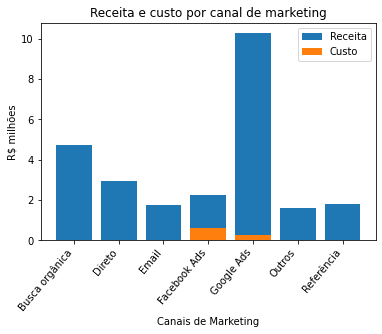

In [ ]:
custo = df_midia
custo_total_g = custo['Google Ads'].sum()
custo_total_f = custo['Facebook Ads'].sum()
title = 'Receita e custo por canal de marketing'
xlabel = 'Canais de Marketing'
ylabel = 'R$ milhões'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.xticks(rotation = 50, ha = 'right')
x = ('Google Ads', 'Facebook Ads')
y = (custo_total_g/1000000, custo_total_f/1000000)
plt.bar(x_axis, y_axis, label = 'Receita')
plt.bar(x, y, label = 'Custo')
plt.legend()

In [ ]:
custo_midia = df_midia
custo_midia= pd.DataFrame(custo_midia[['Facebook Ads', 'Google Ads']].sum())
custo_midia.columns = ['custo_total']
custo_midia

,custo_total
Facebook Ads,592059.27
Google Ads,270626.07


In [ ]:
receita_midia = pedidos_viz
margem = pd.concat(objs=[custo_midia, receita_midia], axis = 1 )
margem['CUSTO'] = margem.custo_total
margem = margem.reset_index()
margem = margem.drop(labels = ['index', 'custo_total'], axis = 1)
margem.iloc[5, -1] = margem.iloc[0, -1]
margem.iloc[6, -1] = margem.iloc[1, -1]
margem = margem.drop(labels = [(0), (1)], axis = 0)
margem = margem.fillna(value = 0)
margem['MARGEM'] = margem.RECEITA - margem.CUSTO
margem

,CANAL_MARKETING,RECEITA,CUSTO,MARGEM
2,Busca orgânica,4.722539e+06,0.00,4.722539e+06
3,Direto,2.963370e+06,0.00,2.963370e+06
4,Email,1.773147e+06,0.00,1.773147e+06
5,Facebook Ads,2.251013e+06,592059.27,1.658954e+06
6,Google Ads,1.026167e+07,270626.07,9.991048e+06
7,Outros,1.581049e+06,0.00,1.581049e+06
8,Referência,1.788930e+06,0.00,1.788930e+06


Visualização - Margem de Lucro por Canal de Marketing

<BarContainer object of 7 artists>

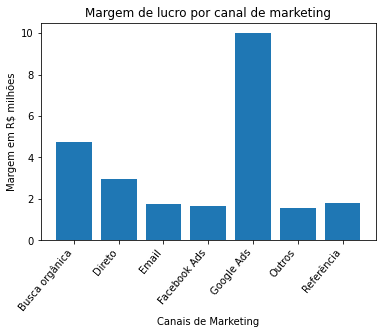

In [ ]:
x_margem = margem.CANAL_MARKETING
y_margem = margem.MARGEM/1000000
xlabel = 'Canais de Marketing'
ylabel = 'Margem em R$ milhões'
title = 'Margem de lucro por canal de marketing'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.xticks (rotation = 50, ha = 'right')
plt.bar (x_margem, y_margem)

###Resultado
#### Obeserva-se que os canais de marketing que conferem maior margem de lucro são o Google Ads e a busca orgânica. Portanto seria interessante focar a alocação de recursos no Google Ads e em ferramentas para aumentar a exposição em busca orgânica

#Recorrência

##Análise 4 
###No final de 2020, a empresa lançou um programa de fidelidade para aumentar a recorrência dos clientes, ou seja, estimular uma nova compra dos clientes já existentes.


### Análise 4.1
####É possível perceber um aumento na frequência média de compras dos clientes?

In [ ]:
query = 'SELECT * FROM pedidos'
tabela_pedidos = pd.read_sql_query(query, engine).copy()
tabela_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATA_VENDA          296937 non-null  object 
 1   PEDIDO              296937 non-null  int64  
 2   PEDIDO_ERP          296937 non-null  object 
 3   COD_CLIENTE         296937 non-null  int64  
 4   PRODUTO             296937 non-null  object 
 5   QTDE                296937 non-null  int64  
 6   PRECO_UNITARIO      296937 non-null  float64
 7   DESCONTO_ITEM       296937 non-null  float64
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64
 9   RECEITA             296937 non-null  float64
 10  CUSTO_FRETE         296937 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 24.9+ MB


Sabe-se que na tabela pedidos o valor COD_CLIENTE se repete em uma mesma compra pois tem uma linha para cada produto comprado


In [ ]:
tabela_pedidos.head(30)

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57
5,2020-01-01 00:00:00.000000,7000012,P10000123130,4060423,E10454Y,1,149.9,-14.99,33.20,168.11,33.20
6,2020-01-01 00:00:00.000000,7000014,P10000123134,4084931,E10110Y,1,49.9,0.00,10.00,59.90,10.00
7,2020-01-01 00:00:00.000000,7000015,P10000123136,4138415,E10069Y,1,69.9,0.00,8.08,77.98,8.08
8,2020-01-01 00:00:00.000000,7000018,P10000123139,4057603,E10431Y,1,149.9,-10.00,17.62,157.52,17.62
9,2020-01-01 00:00:00.000000,7000019,P10000123140,4127006,E10158Y,1,29.9,0.00,0.00,29.90,0.00


In [ ]:
cliente_data = tabela_pedidos[['DATA_VENDA', 'COD_CLIENTE', 'PEDIDO_ERP']]


cliente_data.duplicated().sum()

124905

Portanto o df será filtrado por pedido. Apenas o primeiro registro do pedido permanece

In [ ]:
cliente_data = cliente_data.drop_duplicates(subset = ['PEDIDO_ERP'], keep = 'first')
cliente_data = cliente_data.drop(labels = ['PEDIDO_ERP'], axis = 1)
cliente_data.head()

,DATA_VENDA,COD_CLIENTE
0,2020-01-01 00:00:00.000000,4040690
1,2020-01-01 00:00:00.000000,4003939
2,2020-01-01 00:00:00.000000,4043259
3,2020-01-01 00:00:00.000000,4090303
4,2020-01-01 00:00:00.000000,4080417


Criando coluna MES e ANO

In [ ]:
cliente_data.DATA_VENDA = pd.to_datetime (cliente_data.DATA_VENDA)
cliente_data['MES'] = cliente_data.DATA_VENDA.dt.month
cliente_data['ANO'] = cliente_data.DATA_VENDA.dt.year
cliente_data_2020 = cliente_data[cliente_data['ANO'] == 2020]
clientes_janeiro_2020 = cliente_data_2020[cliente_data_2020['MES'] == 1]
clientes_janeiro_2020.sort_values('COD_CLIENTE', ascending = False).head(50)



,DATA_VENDA,COD_CLIENTE,MES,ANO
1143,2020-01-17,4146331,1,2020
9849,2020-01-30,4146324,1,2020
5918,2020-01-15,4146306,1,2020
1520,2020-01-21,4146274,1,2020
9263,2020-01-26,4146244,1,2020
2025,2020-01-27,4146226,1,2020
8982,2020-01-25,4146220,1,2020
1858,2020-01-24,4146169,1,2020
12307,2020-01-11,4146134,1,2020
261,2020-01-06,4146073,1,2020


Observa-se que existem clientes que fizeram mais de uma compra no mesmo mês (por exemplo: 4146073) . Portanto posso dividir clientes recorrentes em 2, aqueles que fizeram mais de uma compra no mes e aqueles que fizeram uma segunda compra em outro período. 

In [ ]:
#Criando a lista de clientes que compraram mais de uma vez em janeiro
clientes_recorr_jan = clientes_janeiro_2020.value_counts(['COD_CLIENTE'])
clientes_recorr_jan = clientes_recorr_jan[clientes_recorr_jan>1]
clientes_recorr_jan = pd.DataFrame(clientes_recorr_jan)
clientes_recorr_jan.reset_index()
clientes_recorr_jan.rename(columns = {0: 'Numero_compras'}, inplace = True)
clientes_recorr_jan = clientes_recorr_jan.reset_index()
clientes_recorr_jan['MES'] = 1
clientes_recorr_jan


,COD_CLIENTE,Numero_compras,MES
0,4080598,5,1
1,4048649,4,1
2,4047747,4,1
3,4016609,4,1
4,4095545,4,1
...,...,...,...
164,4058240,2,1
165,4134335,2,1
166,4001705,2,1
167,4050091,2,1


Criando df com clientes que fizeram mais de uma compra no mes em 2020

In [ ]:
cliente_data[cliente_data['ANO'] == 2020]
b = pd.DataFrame(columns=['COD_CLIENTE', 'Numero_compras',  'MES'])


b

,COD_CLIENTE,Numero_compras,MES


In [ ]:
for mes in range(1, 13):             
  df = cliente_data[cliente_data['MES'] == mes]
  df = df[df['MES'] == mes]
  df = df.value_counts(['COD_CLIENTE'])
  df = df[df>1]
  df = pd.DataFrame (df)
  df['MES'] = mes
  df = df.rename(columns = {0: 'Numero_compras'}).reset_index()

  b = pd.concat([b, df])
recorrencia_mes_2020 = b
recorrencia_mes_2020

,COD_CLIENTE,Numero_compras,MES
0,4121425,10,1
1,4143993,7,1
2,4095545,6,1
3,4086033,6,1
4,4062928,6,1
...,...,...,...
1003,4143764,2,12
1004,4146145,2,12
1005,4002332,2,12
1006,4074131,2,12


Criando df com clientes que fizeram mais de uma compra no mes em 2021

In [ ]:
cliente_data[cliente_data['ANO'] == 2021]
c = pd.DataFrame(columns=['COD_CLIENTE', 'Numero_compras',  'MES'])


In [ ]:
for mes in range(1, 4):             
  df = cliente_data[cliente_data['MES'] == mes]
  df = df[df['MES'] == mes]
  df = df.value_counts(['COD_CLIENTE'])
  df = df[df>1]
  df = pd.DataFrame (df)
  df['MES'] = mes
  df = df.rename(columns = {0: 'Numero_compras'}).reset_index()

  c = pd.concat([c, df])
recorrencia_mes_2021 = c
recorrencia_mes_2021

,COD_CLIENTE,Numero_compras,MES
0,4121425,10,1
1,4143993,7,1
2,4095545,6,1
3,4086033,6,1
4,4062928,6,1
...,...,...,...
196,4033647,2,3
197,4142152,2,3
198,4105892,2,3
199,4033830,2,3


O que eu quero fazer ?

1 - Pegar a lista de codigo de clientes no mes e comparar com a base dos clientes antigos

2 - Adicionar os clientes novos a uma base de clientes novos


3 - Adicionar os clientes novos à lista de clientes antigos

4 - Passar para o próximo mês

Criando o lugar onde será armazenado os clientes que já compraram começando tomando janeiro como inicio

In [ ]:
clientes_antigos = cliente_data[cliente_data['ANO'] == 2020]
clientes_antigos = clientes_antigos[['COD_CLIENTE', 'MES']].drop_duplicates()
clientes_antigos_inicial = clientes_antigos[clientes_antigos['MES']==1]
clientes_antigos_inicial
antigos = clientes_antigos_inicial
antigos

,COD_CLIENTE,MES
0,4040690,1
1,4003939,1
2,4043259,1
3,4090303,1
4,4080417,1
...,...,...
17660,4070588,1
17661,4068349,1
17662,4101531,1
17735,4024776,1


left = antigos, right = fevereiro --> Eu quero um right excluding join para pegar os cliente de fevereiro que não estao na lista dos antigos == Clientes novos

In [ ]:
#Base onde serão armazenados os clientes novos
clientes_novos = pd.DataFrame(columns=['COD_CLIENTE', 'MES'])
clientes_novos


,COD_CLIENTE,MES


Fazendo o loop para todos os meses em 2020

In [ ]:
for mes in range(1, 13):
  clientes_ano = cliente_data[cliente_data['ANO'] == 2020]
  clientes_mes = clientes_ano[clientes_ano['MES']== mes]
  clientes_mes = clientes_mes[['COD_CLIENTE', 'MES']].drop_duplicates()
  q = pd.merge(antigos, clientes_mes, how ='right', on= 'COD_CLIENTE', indicator= 'right only') 
  q =  q[q['right only'] == 'right_only']
  q = q.rename(columns = {'MES_y': 'MES'})
  novos_mes = q.drop(columns = (['MES_x', 'right only']))
  clientes_novos = pd.concat([clientes_novos, novos_mes]) #adicionando os novos do mes à lista de novos
  antigos = pd.concat([antigos, novos_mes]) #adicionando os novos clientes do mes aos antigos

antigos_2020 = antigos
clientes_novos_2020 = clientes_novos
clientes_novos_2020

,COD_CLIENTE,MES
0,4132557,2
1,4020591,2
2,4125343,2
3,4090660,2
4,4051716,2
...,...,...
16491,4116690,12
16492,4047403,12
16493,4145384,12
16494,4123929,12


In [ ]:
antigos_mes = antigos_2020.groupby('MES').count().cumsum().reset_index()
antigos_mes = antigos_mes.rename(columns = {'COD_CLIENTE':'NUMERO_CLIENTES_ANTIGOS'})
antigos_mes

,MES,NUMERO_CLIENTES_ANTIGOS
0,1,4746
1,2,8746
2,3,12715
3,4,21022
4,5,44877
5,6,64408
6,7,75444
7,8,84397
8,9,90305
9,10,97142


In [ ]:
clientes_novos_mes = clientes_novos_2020.groupby('MES').count().reset_index()
clientes_novos_mes = clientes_novos_mes.rename(columns = {'COD_CLIENTE': 'NUMERO_CLIENTES_NOVOS'})
clientes_novos_mes

,MES,NUMERO_CLIENTES_NOVOS
0,2,4000
1,3,3969
2,4,8307
3,5,23855
4,6,19531
5,7,11036
6,8,8953
7,9,5908
8,10,6837
9,11,22254


Visualização - Número de clientes antigos

<BarContainer object of 12 artists>

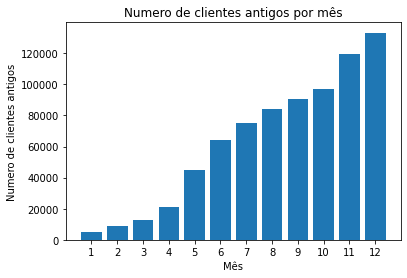

In [ ]:
x_axis_a = antigos_mes.MES
y_axis_a = antigos_mes.NUMERO_CLIENTES_ANTIGOS
xlabel_a = 'Mês'
ylabel_a = 'Numero de clientes antigos'
title = 'Numero de clientes antigos por mês'
plt.title(title)
plt.xticks (x_axis_a)
plt.xlabel(xlabel_a)
plt.ylabel(ylabel_a)
plt.bar(x_axis_a, y_axis_a)

Vizualização clientes novos

No handles with labels found to put in legend.


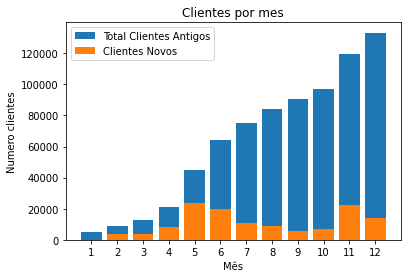

In [ ]:
x_axis = clientes_novos_mes.MES
y_axis = clientes_novos_mes.NUMERO_CLIENTES_NOVOS
ylabel = 'Numero clientes'
xlabel = 'Mês'
title = 'Clientes por mes'
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.bar(x_axis_a, y_axis_a, label = 'Total Clientes Antigos')
plt.bar(x_axis, y_axis, label = 'Clientes Novos')
plt.xticks(x_axis_a)
plt.legend() 

Avaliação na frequencia média de compra de clientes recorrentes

In [ ]:
recorrencia_mes_2020.sort_values('Numero_compras', ascending = False)
r_mes_2020 = recorrencia_mes_2020[['Numero_compras', 'MES']]
r_mes_2020.Numero_compras = pd.to_numeric(r_mes_2020.Numero_compras)
r_mes_2020 = r_mes_2020.groupby('MES').mean().reset_index()
r_mes_2020


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,MES,Numero_compras
0,1,2.170623
1,2,2.149856
2,3,2.109453
3,4,2.107692
4,5,2.091146
5,6,2.058910
6,7,2.100932
7,8,2.174927
8,9,2.180505
9,10,2.198413


Avaliação na frequencia média de compra dos clientes por mes


In [ ]:
for mes in range(1, 13):             
  df = cliente_data[cliente_data['MES'] == mes]
  df = df[df['MES'] == mes]
  df = df.value_counts(['COD_CLIENTE'])
  df = pd.DataFrame (df)
  df['MES'] = mes
  df = df.rename(columns = {0: 'Numero_compras'}).reset_index()

  b = pd.concat([b, df])

b.Numero_compras = pd.to_numeric(b.Numero_compras)
media_total = b.groupby(['MES']).mean()
media_total = media_total.reset_index()
media_total

,MES,Numero_compras
0,1,1.114414
1,2,1.080835
2,3,1.066458
3,4,1.049371
4,5,1.066039
5,6,1.066803
6,7,1.110290
7,8,1.076652
8,9,1.090833
9,10,1.107206


Visualização - Numero médio de compras por clientes recorrentes no mês e clientes totais

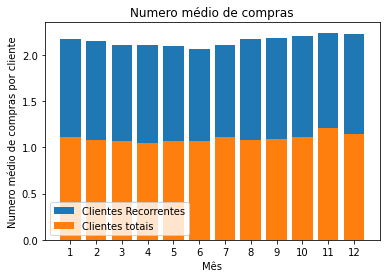

In [ ]:
x_axis = r_mes_2020.MES
y_axis_mt = media_total.Numero_compras
y_axis = r_mes_2020.Numero_compras
xlabel = 'Mês'
ylabel = 'Numero médio de compras por cliente'
title = 'Numero médio de compras'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(x_axis)
plt.title(title)
plt.bar(x_axis, y_axis, label = 'Clientes Recorrentes')
plt.bar(x_axis, y_axis_mt, label = 'Clientes totais')
plt.legend(loc = 3)

###Análise 4.2

####É possível perceber um aumento da participação de clientes antigos no faturamento?


In [ ]:
df['MES'] = data_mes.MES
e = df[['COD_CLIENTE', 'RECEITA', 'MES']]
e.MES = e.MES.astype(int)

KeyError: ignored

In [ ]:
e

In [ ]:
i = pd.merge(e, s, how = 'left', on = 'COD_CLIENTE')
i.tail(100)


In [ ]:
d = e[['COD_CLIENTE']][e['MES'] == 2]

###Resultado

#Margem

##Análise 5

###Analise da margem média de cada pedido.

Adicionando a linha de produto à tabela

In [ ]:
query = 'SELECT * FROM info_produto'
b = pd.read_sql_query(query, engine)
b.head()


,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,A10001G,21.1,BASICO
1,A10002M,21.1,BASICO
2,A10003M,22.6,BASICO
3,A10004P,22.6,BASICO
4,A10005M,22.6,BASICO


In [ ]:
query = 'SELECT * FROM pedidos'
a = pd.read_sql_query(query, engine)
df = pd.merge(a, b, on = 'PRODUTO', how = 'left')
df

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CUSTO_MERCADORIA,LINHA_PRODUTO
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,45.10,ACESSORIOS
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,43.13,BOLSAS
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,21.97,FASHION
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,6.73,BASICO
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,36.67,ACESSORIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-10 00:00:00.000000,8000000011,P10000294136,4049216,B10203,1,59.9,0.00,21.00,80.90,21.00,7.76,BASICO
296933,2020-12-10 00:00:00.000000,8000000012,P10000294137,4019312,E10860Y,1,89.9,0.00,10.50,100.40,10.50,12.38,FASHION
296934,2020-12-10 00:00:00.000000,8000000015,P10000294140,4055873,E10058Y,1,229.9,0.00,10.50,240.40,10.50,36.67,ACESSORIOS
296935,2020-12-10 00:00:00.000000,8000000017,P10000294142,4086203,E10809Y,1,59.9,0.00,4.56,64.46,4.56,8.88,BASICO


Criando a coluna de imposto consideranto que o imposto é 27,25% o valor de venda do produto

In [ ]:
df['IMPOSTO'] = df['PRECO_UNITARIO']*df['QTDE']*0.2725
df

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CUSTO_MERCADORIA,LINHA_PRODUTO,IMPOSTO
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,45.10,ACESSORIOS,40.84775
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,43.13,BOLSAS,51.74775
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,21.97,FASHION,35.39775
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,6.73,BASICO,10.84550
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,36.67,ACESSORIOS,51.74775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-10 00:00:00.000000,8000000011,P10000294136,4049216,B10203,1,59.9,0.00,21.00,80.90,21.00,7.76,BASICO,16.32275
296933,2020-12-10 00:00:00.000000,8000000012,P10000294137,4019312,E10860Y,1,89.9,0.00,10.50,100.40,10.50,12.38,FASHION,24.49775
296934,2020-12-10 00:00:00.000000,8000000015,P10000294140,4055873,E10058Y,1,229.9,0.00,10.50,240.40,10.50,36.67,ACESSORIOS,62.64775
296935,2020-12-10 00:00:00.000000,8000000017,P10000294142,4086203,E10809Y,1,59.9,0.00,4.56,64.46,4.56,8.88,BASICO,16.32275


Calculando a Margem por produto

In [ ]:
df['CUSTO_TOTAL'] = df['CUSTO_FRETE'] + df['CUSTO_MERCADORIA']+df['IMPOSTO']
df['MARGEM'] = df['RECEITA'] - df['CUSTO_TOTAL']
df['MARGEM'].describe()

count    296937.000000
mean         40.372004
std          49.729367
min       -1067.185000
25%          10.147250
50%          27.417250
75%          61.537250
max        5784.920250
Name: MARGEM, dtype: float64

Visualização - Histograma da margem dos produtos

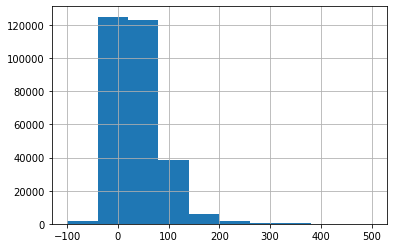

<Figure size 432x288 with 0 Axes>

In [ ]:
df['MARGEM'].hist(range = [-100, 500])
_=plt.figure()

Calculando a margem por pedido

In [ ]:
margem_pedido = df[['PEDIDO_ERP', 'MARGEM']]

margem_pedido = margem_pedido.groupby('PEDIDO_ERP').sum().reset_index()

margem_pedido['MARGEM'].describe()

count    172031.000000
mean         69.684777
std          67.179912
min       -1169.828500
25%          29.162250
50%          57.447250
75%          95.543500
max        5797.532500
Name: MARGEM, dtype: float64

Visualização Margem por pedido

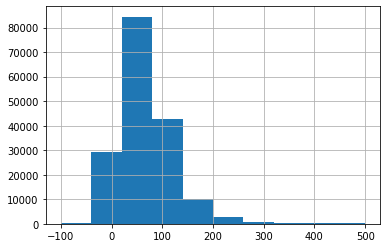

<Figure size 432x288 with 0 Axes>

In [ ]:
margem_pedido['MARGEM'].hist(range = [-100, 500])
_=plt.figure()

Linha de produtos com menor margem para ser excluída


In [ ]:
df.head()

linha_margem = df[['LINHA_PRODUTO', 'MARGEM']]


linha_margem = linha_margem.groupby(['LINHA_PRODUTO']).sum().reset_index()

linha_margem



,LINHA_PRODUTO,MARGEM
0,ACESSORIOS,4.171557e+06
1,BASICO,3.017859e+06
2,BOLSAS,1.813285e+06
3,COMPLEMENTOS,3.104443e+03
4,FASHION,2.168369e+06
5,TECH,6.854024e+05


Visualização margem de lucro por linha de produto

<BarContainer object of 6 artists>

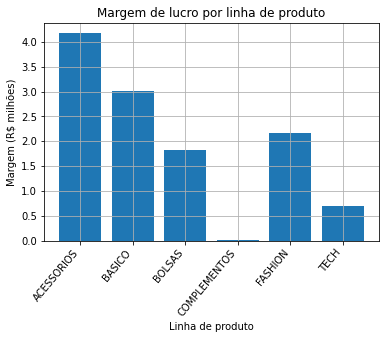

In [ ]:
x_axis_m = linha_margem.LINHA_PRODUTO
y_axis_m = linha_margem.MARGEM/1000000
title = 'Margem de lucro por linha de produto'
ylabel = 'Margem (R$ milhões)'
xlabel = 'Linha de produto'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 50, ha = 'right')
plt.grid(axis = 'both')
plt.bar(x_axis_m, y_axis_m)

Receita por linha de produto

In [ ]:
linha_receita = df[['LINHA_PRODUTO', 'RECEITA']]


linha_receita = linha_receita.groupby(['LINHA_PRODUTO']).sum().reset_index()

linha_receita


,LINHA_PRODUTO,RECEITA
0,ACESSORIOS,9.686336e+06
1,BASICO,7.520475e+06
2,BOLSAS,4.262632e+06
3,COMPLEMENTOS,7.183720e+03
4,FASHION,4.778655e+06
5,TECH,1.983271e+06


Visualização receita por linha de produto

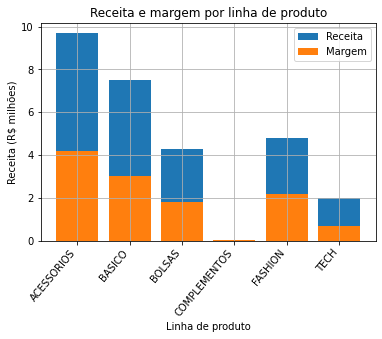

In [ ]:
x_axis = linha_receita.LINHA_PRODUTO
y_axis = linha_receita.RECEITA/1000000
title = 'Receita e margem por linha de produto'
ylabel = 'Receita (R$ milhões)'
xlabel = 'Linha de produto'

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 50, ha = 'right')
plt.grid(axis = 'both')
plt.bar(x_axis, y_axis, label = 'Receita')
plt.bar(x_axis_m, y_axis_m, label = 'Margem')

plt.legend()


In [ ]:
a = df[['RECEITA', 'CUSTO_MERCADORIA', 'LINHA_PRODUTO', 'MARGEM']]
a.RECEITA.describe()
b = a
b.RECEITA = a[a['RECEITA']< 1000]

In [ ]:
sns.FacetGrid(b, hue="LINHA_PRODUTO", height=5, xlim=(0,100)).map(sns.kdeplot, "MARGEM").add_legend()

plt.show()

- Falta ver:

- Analisar clientes antigos por receita (4.1)
- Ver o Grid (todos)
- Rever siginificado dos indicadores falados nos videos
- Resultados análise 4
- Visualização das margens em porcentagem
- Continuar no Merge
- Fazer lista de indicadores descritos no videos
- Ver quais indicadores da pra fazer